# Numpy => The python numerical library

numpy array => basically the main datastructure of numpy

originally used for a collection of scientific libraries (scipy)

it comes with lots of functionalities => the api is huge

In [1]:
from __future__ import annotations
import numpy as np
from random import randint

a = [randint(0, 1000) for _ in range(100_000)]
b = [randint(0, 1000) for _ in range(100_000)]

# from solutions import *  # this is bad pratice do not do this unless you want to hide stuff

In [2]:
%%timeit
c = [i+j for i,j in zip(a, b)]

18.1 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
l = [0, 4, 6]
k = [1, 6, 10, 5]

for K, L in zip(k[1:], l):
    print(K + L)

k[1:]

6
14
11


[6, 10, 5]

In [4]:
a = np.random.randint(low=0, high=1000, size=(10, 10))
b = np.random.randint(low=0, high=1000, size=(10, 10))

In [5]:
np.uint8(-2)

254

In [6]:
%%timeit
c = a + b

1.02 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Implement a function to read the data from rain.csv

In [7]:
def read_rain_prcp() -> list[float]: # this is a typing annotation super usefull for clarity
    # the rain file path is ../data/rain.csv
    # read the second column in the rain file
    # use string manipulation, indexing, type conversion in some loop to get the data
    with open("../data/rain.csv", "r") as rain_file:
        lines = rain_file.read().split("\n")
    return [float(line.split(",")[1]) if "NA" not in line else 0 for line in lines[1:] ]


In [8]:
prcp = read_rain_prcp()

In [9]:
#assert all(prcp == solution for prcp, solution in zip(read_rain_prcp(),read_rain_prcp_sol()))
prcp = read_rain_prcp()
prcp[:5]

[0.47, 0.59, 0.42, 0.31, 0.17]

### Implement a function to extract the average precipitation for all the data we got from the file

In [10]:
def mean_py(nums: list[float]) -> float:
    # use builtins inside this function
    # sum , len
    m = sum(nums) / len(nums)
    return m

def naive_mean(nums: list[float]) -> float:
    # only use basic language constructs like loops and additions, divisions
    total = 0
    counter = 0
    for num in nums:
        total += num
        counter += 1
    return total / counter

mean_py(prcp) == naive_mean(prcp)


True

In [11]:
%%timeit
mean_py(prcp)

239 µs ± 72.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%%timeit
naive_mean(prcp)

3.45 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
from statistics import mean

In [14]:
%%timeit
mean(prcp)

25.3 ms ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
import numpy as np
arr = np.array(prcp)

In [16]:
arr.dtype

dtype('float64')

In [17]:
%%timeit
np.mean(arr)

43.9 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit
np.mean(prcp)

3.3 ms ± 706 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
from dis import dis
dis(mean_py)

  4           0 LOAD_GLOBAL              0 (sum)
              2 LOAD_FAST                0 (nums)
              4 CALL_FUNCTION            1
              6 LOAD_GLOBAL              1 (len)
              8 LOAD_FAST                0 (nums)
             10 CALL_FUNCTION            1
             12 BINARY_TRUE_DIVIDE
             14 STORE_FAST               1 (m)

  5          16 LOAD_FAST                1 (m)
             18 RETURN_VALUE


In [20]:
dis(mean_py)

  4           0 LOAD_GLOBAL              0 (sum)
              2 LOAD_FAST                0 (nums)
              4 CALL_FUNCTION            1
              6 LOAD_GLOBAL              1 (len)
              8 LOAD_FAST                0 (nums)
             10 CALL_FUNCTION            1
             12 BINARY_TRUE_DIVIDE
             14 STORE_FAST               1 (m)

  5          16 LOAD_FAST                1 (m)
             18 RETURN_VALUE


## Numpy

    - what it do
    - how it be


In [23]:
arr = np.array([i for i in range(25)], dtype=np.uint8)

In [24]:
print(arr.shape)
print(arr.ndim)
print(arr.sum())
print(arr.dtype)

(25,)
1
300
uint8


In [25]:
arr.mean()

12.0

In [26]:
import numpy as np


a = np.array([1, 10.5])
a.dtype

dtype('float64')

In [27]:
print(np.random)
print(np.linalg)
np.max, np.sum, np.where, np.min, np.add, np.multiply, np.cos, np.arange, np.linspace


<module 'numpy.random' from 'c:\\Users\\aoun\\Desktop\\programs\\py201\\venv\\lib\\site-packages\\numpy\\random\\__init__.py'>
<module 'numpy.linalg' from 'c:\\Users\\aoun\\Desktop\\programs\\py201\\venv\\lib\\site-packages\\numpy\\linalg\\__init__.py'>


(<function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 <function numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 <function numpy.where>,
 <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 <ufunc 'add'>,
 <ufunc 'multiply'>,
 <ufunc 'cos'>,
 <function numpy.arange>,
 <function numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)>)

### Types ? How does that work inside a python flexible environment ?

In [28]:
np.linspace(1,10,3)

array([ 1. ,  5.5, 10. ])

In [29]:
arr = np.array(prcp, dtype=np.float16)

In [30]:
arr.mean()
arr.std()


0.239

In [31]:
# watchout for overflows / wrap around
np.uint8(300)

44

### Slicing

*Just like many other iterables, arrays support complex indexing*

```arr[0, 0]``` to get the first element in a 2d array

In [32]:
arr[::-1]
"hello world"[::-1]

'dlrow olleh'

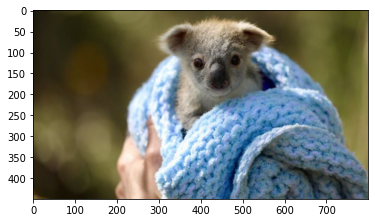

In [33]:
from matplotlib import image
import matplotlib.pyplot as plt

koala :np.ndarray = image.imread("../data/koala.jpeg")

plt.imshow(koala)
plt.show()

In [34]:
koala.shape

(450, 800, 3)

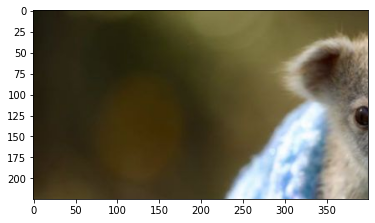

In [35]:
plt.imshow(koala[:koala.shape[0]//2,:koala.shape[1]//2, :])
plt.show()

In [36]:
np.array(range(10))[:2]

array([0, 1])

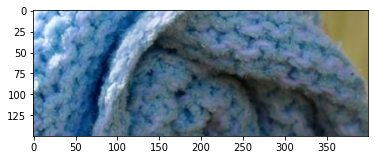

In [37]:
plt.imshow(koala[300:, 400:,:]);plt.show()

In [38]:
koala.dtype

dtype('uint8')

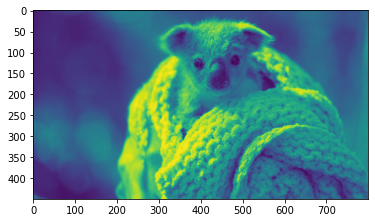

In [39]:
plt.imshow(np.mean(koala, axis=2))

### Implement a function to zoom on the lower right quarter of the image 

In [40]:
def zoom(image: np.ndarray) -> np.ndarray:
    """shows lower right quarter, returns sliced matrix"""
    shape_x = image.shape[0] // 2
    shape_y = image.shape[1] // 2

    focus:np.ndarray = image[shape_x:,shape_y:]
    return focus

sliced = zoom(koala)

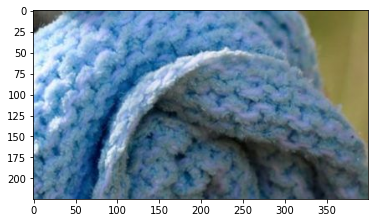

In [41]:
plt.imshow(sliced)
plt.show()

### Create a random noise matrix with the same shape as the koala matrix, max value of each item should be 70

    - show the result of the image after adding the random noise
    - show the result of the image after substracting the random noise

In [42]:
noise = np.random.randint(low=0, high=30, size=koala.shape, dtype=np.uint8)

In [43]:
noise.shape
noise.dtype

dtype('uint8')

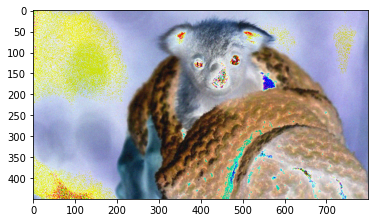

In [44]:
plt.imshow(noise - koala)

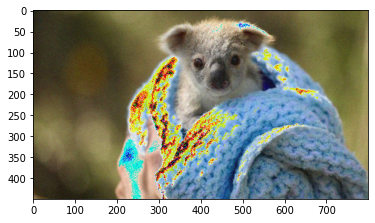

In [45]:
plt.imshow(noise + koala)

### polarizing

select the pixels that are:

    - too bright (sum of their values > 255 * 0.8 * 3): set them to white
    - too dark (sum of their values < 255 * 0.2 * 3): set them to black

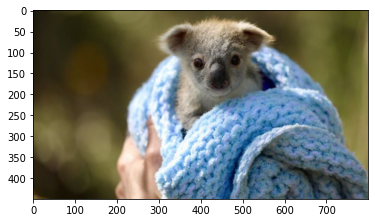

In [46]:
plt.imshow(koala)

In [47]:
koala[np.sum(koala, axis=2) > 255 * 0.8 * 3] = (255, 255, 255)
koala[np.sum(koala, axis=2) < 255 * 0.2 * 3] = (0, 0, 0)

In [48]:
koala.shape

(450, 800, 3)

In [49]:
np.sum(koala, axis=0, dtype=np.uint8).shape

(800, 3)

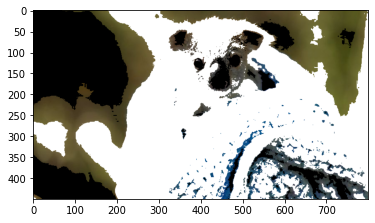

In [50]:
k = koala.copy()
k[np.sum(koala, axis=2) > 270] = 255
plt.imshow(k)
plt.show()

In [51]:
koala[np.sum(koala, axis=2) > 270]
k[np.sum(koala, axis=2) > 270] = 255

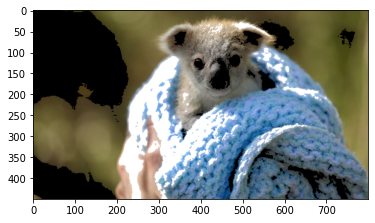

In [52]:
plt.imshow(koala)
plt.show()

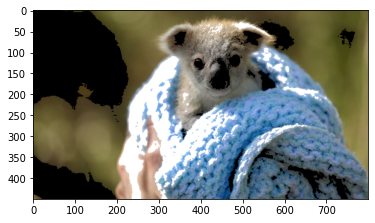

In [53]:
def polarize(image:np.ndarray)-> np.ndarray:
    """polarize the image"""
    altered = image.copy()
    altered[np.sum(image, axis=2) > 255*0.8*3] = 255
    altered[np.sum(image, axis=2) < 255*0.2*3] = 0
    return altered

polarized = polarize(koala)
plt.imshow(polarized)
plt.show()

In [54]:
k[:, :, 1] = 0
k[:, :, 2] = 0

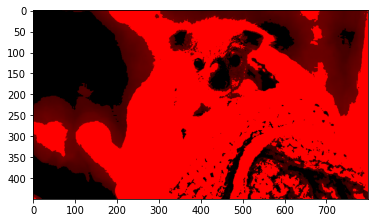

In [55]:
plt.imshow(k)

### blue koala and other cute things

Set all the RGB channels other than blue to be black this way we'll have an image with only blue pixels

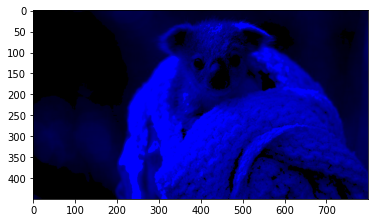

In [56]:
def blue(image: np.ndarray) -> np.ndarray:
    """blacks out Red and Green channels of image"""
    other = image.copy()
    other[:,:,0] = 0
    other[:,:,1] = 0
    return other

b_k = blue(koala)
plt.imshow(b_k)
plt.show()

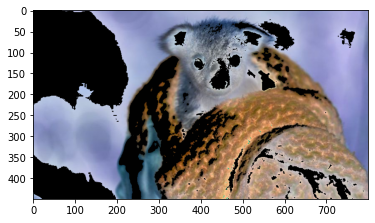

In [57]:
def negative(image:np.ndarray)->np.ndarray:
    """output the negative of the image"""
    return -image

neg = negative(koala)
plt.imshow(neg)
plt.show()

In [58]:
def blur(image:np.ndarray, steps:int) -> np.ndarray:
    """ blur the image by setting pixels to a local average value

    we first divide the image into N pieces and average out the color of each piece
    we then set those pieces to the average color
    """
    x_shape = image.shape[0]
    x_step = x_shape // steps
    y_shape = image.shape[1]
    y_step = y_shape // steps

    copy = image.copy()
    for i in range(0, x_shape, x_step):
        for j in range(0, y_shape, y_step):
            sub = image[i:i+x_step, j:j+ y_step,:]
            copy[i:i+x_step, j:j+ y_step,:] = sub.mean(axis=0).mean(axis=0)
    return copy

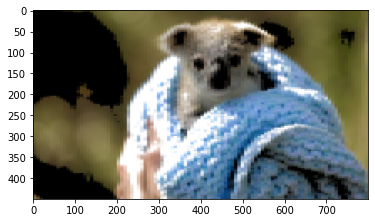

In [60]:
plt.imshow(blur(koala, 100));plt.show()

## Back to the RAIN

In [61]:
rain = np.array(read_rain_prcp(), dtype=np.float16)

def read_temp_data() -> tuple[np.ndarray,np.ndarray]:
    with open("../data/rain.csv", "r") as file:
        max_temp = []
        min_temp = []
        lines = file.read().split("\n")[1:]
        for line in lines:
            _, _, max_t, min_t, _ = line.split(",")
            max_temp.append(max_t)
            min_temp.append(min_t)

        max_temp = np.array(max_temp, dtype=np.uint8)
        min_temp = np.array(min_temp, dtype=np.uint8)
    return max_temp, min_temp

max_t, min_t = read_temp_data()

#### Compute the average temperature for each day

In [68]:
avg_tmp = np.vstack([max_t, min_t]).mean(axis=0)
avg_tmp

array([46.5, 40.5, 40. , ..., 39. , 41. , 43. ])

#### Compute the correlation coefficient between

    - max_t & min_t
    - rain & max_t
    - rain & min_t
    - rain & max_t - min_t


In [69]:
print(np.corrcoef(max_t, min_t), end="\n"+"-"*10+"\n")
print(np.corrcoef(rain, max_t), end="\n"+"-"*10+"\n")
print(np.corrcoef(rain, min_t), end="\n"+"-"*10+"\n")
print(np.corrcoef(rain, max_t-min_t), end="\n"+"-"*10+"\n")

[[1.         0.86089495]
 [0.86089495 1.        ]]
----------
[[ 1.         -0.22685338]
 [-0.22685338  1.        ]]
----------
[[ 1.         -0.06440546]
 [-0.06440546  1.        ]]
----------
[[ 1.         -0.34037549]
 [-0.34037549  1.        ]]
----------


#### Compute the moving rain fall average

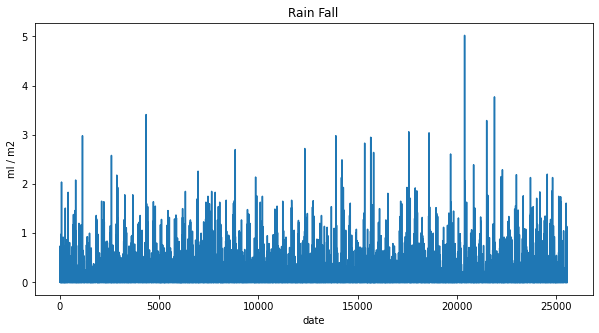

In [70]:
def plot_rain(data: np.ndarray) -> None:
    plt.figure(figsize=(10, 5))
    plt.title("Rain Fall")
    plt.xlabel("date")
    plt.ylabel("ml / m2")
    plt.plot(data)
    plt.show()

plot_rain(rain)

In [71]:
def moving_avg(array: np.ndarray, window:int) -> np.ndarray:
    """ create a new array with the same size as ass given one
        iterate over the old one and fill the new one with the average of the old array window going forward
        hint: use indexing take advantage of the fact that numpy does not error out when slicing over bigger indices
        preallocate with zeros_like, ones_like
    """
    arr = np.ones_like(array)
    for idx, _ in enumerate(array):
        arr[idx] = array[idx:idx+window].mean()
    return arr

mva = moving_avg(rain, 365)

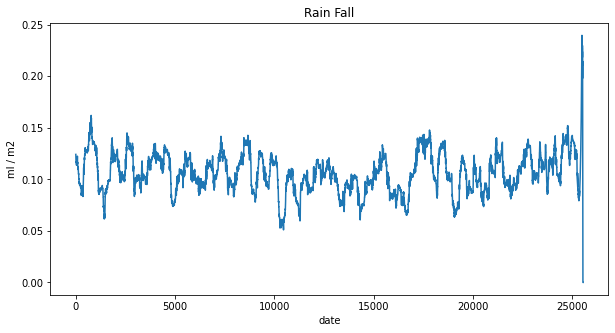

In [72]:
plot_rain(mva)

Some more maths basics are

In [73]:
rain.T

array([0.47, 0.59, 0.42, ..., 0.  , 0.  , 0.  ], dtype=float16)

In [74]:
rain.dot(rain.T)

1748.0

In [75]:
rain.std()

0.239